In [3]:
import sys
import matplotlib.pyplot as plt
sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/testing_ground ', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [4]:
from importlib import reload
import audio_datastore.audio_datastore as myads
reload(myads)
from collections import Counter
import numpy as np
import librosa
from config import *
import utils

In [5]:
print(SAMPLE_RATE)

16000


In [6]:
from processing import process_method_base

datasetFolder = r"/Users/david/Documents/mastersCode/ubm/whale/setup/data_spliced"
ads = myads.AudioDatastore()
ads.populate(datasetFolder,include_sub_folders=True, label_source=True)
Counter(ads.labels).values()
adsTest, adsTrain = myads.split(ads, 5)
adsEnroll, adsTrain = myads.split(adsTrain, 8)
adsTrain, _ = myads.split(adsTrain, 15)
adsNorm, _ = myads.split(ads, 27)

process_method = process_method_base.ProcessMethodBase(snr_db=0, reverb=False)


In [7]:
import torchaudio
import config as config
reload(config)

# simple pre- and post-processing functions
class Processing:
    """
    import file to signal and resample to projects sampling frequency
    """

    @staticmethod
    def file_to_signal(file):
        signal, _ = librosa.load(file, sr=config.SAMPLING_RATE)
        return signal

    @staticmethod
    def normalize_signal(signal):
        signal_normalised = librosa.util.normalize(signal, axis=0)
        return signal_normalised

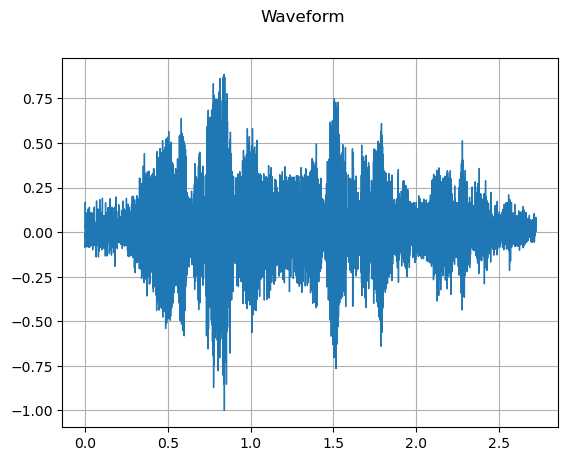

In [8]:
# utils.periodic_power()
import librosa as lib
import utils
reload(utils)

whale_signal = Processing.file_to_signal(adsTrain.files[1])
whale_signal = Processing.normalize_signal(whale_signal)
# utils.plot_waveform_np(whale_signal)
utils.plot_waveform_np(whale_signal)

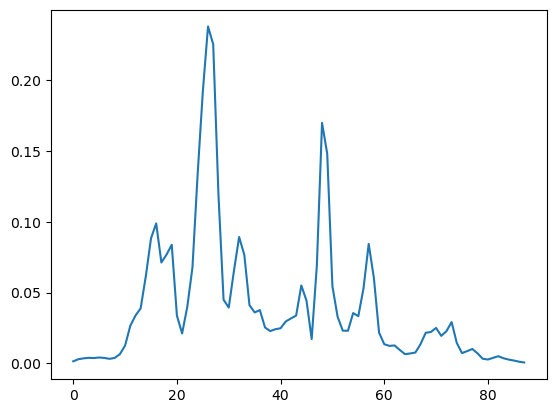

In [16]:
ap = utils.periodic_power(whale_signal, 1000, 500)
plt.plot(ap)
whale_average_power = np.mean(ap)
print(whale_average_power)

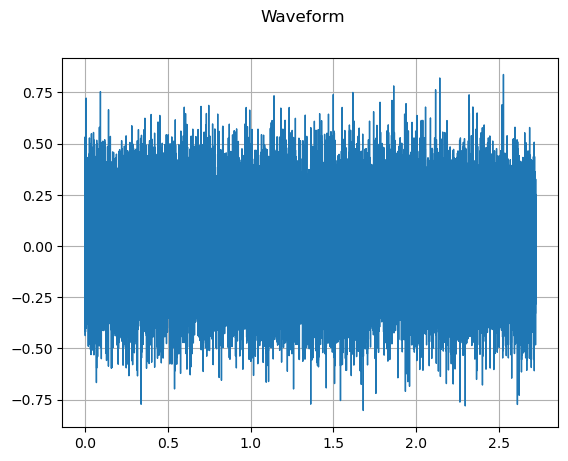

In [19]:
noise_signal = np.random.normal(0, np.sqrt(0.04), len(whale_signal))
utils.plot_waveform_np(noise_signal)

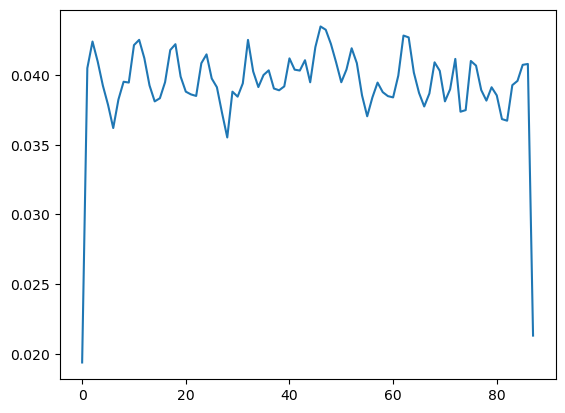

In [20]:
ap = utils.periodic_power(noise_signal, 1000, 500)
plt.plot(ap)
noise_average_power = np.mean(ap) # or square of std

In [21]:
# snr
snr = whale_average_power / noise_average_power